<a href="https://colab.research.google.com/github/noorwewe/Intelligent-System/blob/fuzzy-expert-system/Risk_Analysis_SKFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install scikit-fuzzy

In [48]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
project_funding = ctrl.Antecedent(np.arange(0, 101, 1), 'project_funding')
project_staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'project_staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# Auto-membership function population is possible with .automf(3, 5, or 7)
#project_funding.automf(3)
#project_staffing.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
project_funding['inadequate'] = fuzz.trapmf(project_funding.universe, [0, 0, 25, 45])
project_funding['marginal'] = fuzz.trimf(project_funding.universe, [30, 50, 70])
project_funding['adequate'] = fuzz.trapmf(project_funding.universe, [55, 75, 100, 100])
project_staffing['small'] = fuzz.trapmf(project_staffing.universe, [0, 0, 20, 70])
project_staffing['large'] = fuzz.trapmf(project_staffing.universe, [30, 80, 100, 100])
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trapmf(risk.universe, [20, 40, 60, 80])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

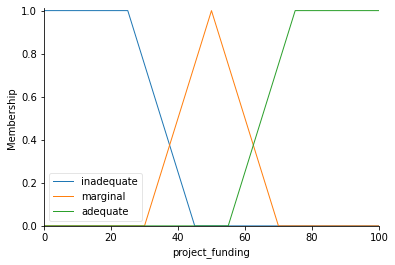

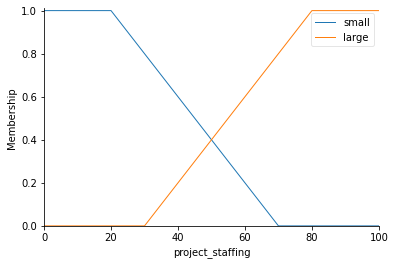

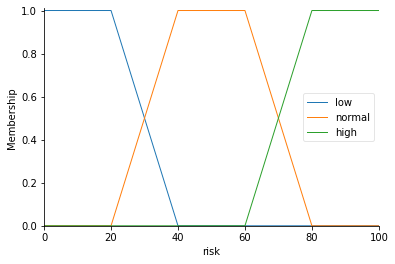

In [49]:
# You can see how these look with .view()
project_funding.view()
project_staffing.view()
risk.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87bd247790>)

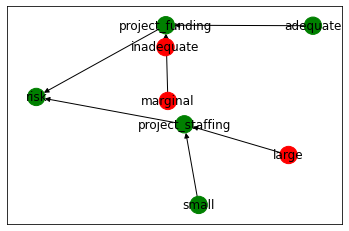

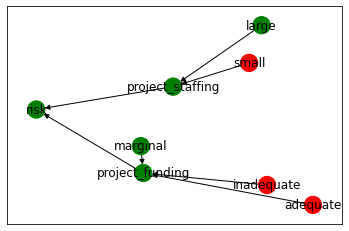

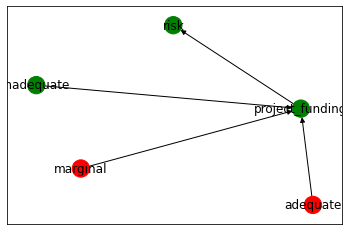

In [50]:
rule1 = ctrl.Rule(project_funding['adequate'] | project_staffing['small'], risk['low'])
rule2 = ctrl.Rule(project_funding['marginal'] & project_staffing['large'], risk['normal'])
rule3 = ctrl.Rule(project_funding['inadequate'], risk['high'])

rule1.view_n()
rule2.view_n()
rule3.view_n()

In [51]:
risk_scoring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [52]:
risk_scoring = ctrl.ControlSystemSimulation(risk_scoring_ctrl)

In [53]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
risk_scoring.input['project_funding'] = 34
risk_scoring.input['project_staffing'] = 66

# Crunch the numbers
risk_scoring.compute()

67.05713620759873


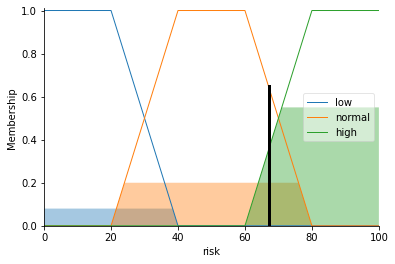

In [54]:
print (risk_scoring.output['risk'])
risk.view(sim=risk_scoring)

In [63]:
risk_scoring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Later we intend to run this system with a 101*101 set of inputs, so we allow
# that many plus one unique runs before results are flushed.
# Subsequent runs would return in 1/8 the time!
sim = ctrl.ControlSystemSimulation(risk_scoring_ctrl, flush_after_run=101 * 101 + 1)

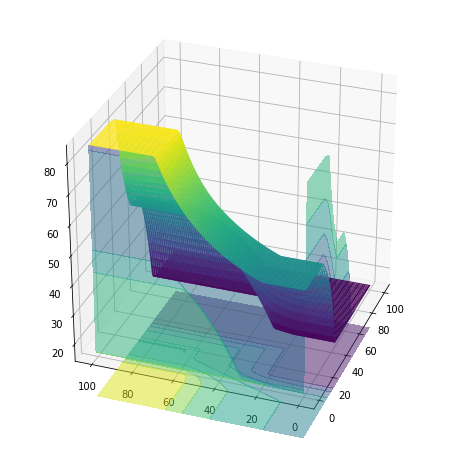

In [70]:
# We can simulate at higher resolution with full accuracy
upsampled = np.linspace(0, 101, 101)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

# Loop through the system 101*101 times to collect the control surface
for i in range(101):
    for j in range(101):
        sim.input['project_funding'] = x[i, j]
        sim.input['project_staffing'] = y[i, j]
        sim.compute()
        z[i, j] = sim.output['risk']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=0, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)